In [1]:
import sklearn
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Task1

In [2]:
train = pd.read_csv('./football_train.csv', index_col=0)
test = pd.read_csv('./football_test.csv', index_col=0)
train.head()

,Date,Opponent,Is_Home_or_Away,Is_Opponent_in_AP25_Preseason,Media,Label
ID,,,,,,
1,09/05/2015,Texas,Home,Out,1-NBC,Win
2,09/12/2015,Virginia,Away,Out,4-ABC,Win
3,09/19/2015,GeorgiaTech,Home,In,1-NBC,Win
4,09/26/2015,UMass,Home,Out,1-NBC,Win
5,10/03/2015,Clemson,Away,In,4-ABC,Lose


In [3]:
test.head()

,Date,Opponent,Is_Home_or_Away,Is_Opponent_in_AP25_Preseason,Media,Label
ID,,,,,,
25,09/02/2017,Temple,Home,Out,1-NBC,Win
26,09/09/2017,Georgia,Home,In,1-NBC,Lose
27,09/16/2017,BostonCollege,Away,Out,2-ESPN,Win
28,09/23/2017,MichiganState,Away,Out,3-FOX,Win
29,09/30/2017,MiamiOhio,Home,Out,1-NBC,Win


In [4]:
# convert:
train['Is_Home_or_Away'] = train['Is_Home_or_Away'].map( {'Home': 1, 'Away': 0} ).astype(int)
train['Is_Opponent_in_AP25_Preseason'] = train['Is_Opponent_in_AP25_Preseason'].map( {'In': 1, 'Out': 0} ).astype(int)
train['Media'] = train['Media'].map( {'1-NBC': 1, '2-ESPN': 2,'3-FOX': 3, '4-ABC': 4, '5-CBS': 5 } ).astype(int)
train['Label'] = train['Label'].map( {'Win': 1, 'Lose': 0} ).astype(int)

test['Is_Home_or_Away'] = test['Is_Home_or_Away'].map( {'Home': 1, 'Away': 0} ).astype(int)
test['Is_Opponent_in_AP25_Preseason'] = test['Is_Opponent_in_AP25_Preseason'].map( {'In': 1, 'Out': 0} ).astype(int)
test['Media'] = test['Media'].map( {'1-NBC': 1, '2-ESPN': 2,'3-FOX': 3, '4-ABC': 4, '5-CBS': 5 } ).astype(int)
test['Label'] = test['Label'].map( {'Win': 1, 'Lose': 0} ).astype(int)

In [5]:
train.head()

,Date,Opponent,Is_Home_or_Away,Is_Opponent_in_AP25_Preseason,Media,Label
ID,,,,,,
1,09/05/2015,Texas,1,0,1,1
2,09/12/2015,Virginia,0,0,4,1
3,09/19/2015,GeorgiaTech,1,1,1,1
4,09/26/2015,UMass,1,0,1,1
5,10/03/2015,Clemson,0,1,4,0


In [6]:
test.head()

,Date,Opponent,Is_Home_or_Away,Is_Opponent_in_AP25_Preseason,Media,Label
ID,,,,,,
25,09/02/2017,Temple,1,0,1,1
26,09/09/2017,Georgia,1,1,1,0
27,09/16/2017,BostonCollege,0,0,2,1
28,09/23/2017,MichiganState,0,0,3,1
29,09/30/2017,MiamiOhio,1,0,1,1


In [7]:
x_train = train[['Is_Home_or_Away','Is_Opponent_in_AP25_Preseason','Media']]
y_train = train['Label']
x_test = test[['Is_Home_or_Away','Is_Opponent_in_AP25_Preseason','Media']]
y_test = test['Label']

In [8]:
# Naïve Bayes
def multinormalcls(x_train, y_train, x_test, y_test):
    mnb = MultinomialNB(alpha=1.0)
    mnb.fit(x_train, y_train)
    
    y_pred = mnb.predict(x_test)
    print("Prediction test data set：", y_pred)
    print("Real test data set：", list(y_test))
    print("Accuracy", mnb.score(x_test, y_test))
    
    print("0 = Lose, 1 = Win")
    print(sklearn.metrics.classification_report(y_test, y_pred, target_names=None))


multinormalcls(x_train, y_train, x_test, y_test)

Prediction test data set： [1 1 1 1 1 0 1 1 1 0 1 0]
Real test data set： [1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0]
Accuracy 0.8333333333333334
0 = Lose, 1 = Win
              precision    recall  f1-score   support

           0       0.67      0.67      0.67         3
           1       0.89      0.89      0.89         9

    accuracy                           0.83        12
   macro avg       0.78      0.78      0.78        12
weighted avg       0.83      0.83      0.83        12



In [9]:
# KNN
def knncls(x_train, y_train, x_test, y_test):
    knn = KNeighborsClassifier(n_neighbors=5)
    knn.fit(x_train,y_train)
    
    y_pred = knn.predict(x_test)
    print("Prediction test data set：", y_pred)
    print("Real test data set：", list(y_test))
    print("Accuracy", knn.score(x_test, y_test))
    
    print("0 = Lose, 1 = Win")
    print(sklearn.metrics.classification_report(y_test, y_pred, target_names=None))
    

knncls(x_train, y_train, x_test, y_test) 

Prediction test data set： [1 1 1 1 1 1 1 1 1 1 1 1]
Real test data set： [1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0]
Accuracy 0.75
0 = Lose, 1 = Win
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         3
           1       0.75      1.00      0.86         9

    accuracy                           0.75        12
   macro avg       0.38      0.50      0.43        12
weighted avg       0.56      0.75      0.64        12



D:\Applications\Anaconda3\envs\pytorch_study\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### Task 2

In [10]:
train_df = pd.read_csv('./train.csv')
test_df = pd.read_csv('./test.csv')
# Fill NaN Mean for Age
train_df['Age'].fillna(value=train_df['Age'].mean(), inplace=True)
# Mode for Embarked
train_df['Embarked'].fillna(value=train_df['Embarked'].mode()[0], inplace=True)

# Rename Sex Value
train_df['Sex'] = train_df['Sex'].replace('female',1)
train_df['Sex'] = train_df['Sex'].replace('male',0)

# Rename Embarked Value
train_df['Embarked'] = train_df['Embarked'].replace('S',2)
train_df['Embarked'] = train_df['Embarked'].replace('C',1)
train_df['Embarked'] = train_df['Embarked'].replace('Q',0)

x_train = train_df[['Fare', 'Sex', 'Pclass', 'Age', 'Parch']]
y_train = train_df['Survived']
# x_test = test_df[['Fare', 'Sex', 'Pclass', 'Age', 'Parch']]
# y_test = test_df['Survived']

In [27]:
# Naïve Bayes
def multinormalcls(x, y):
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)
    
    mnb = MultinomialNB()
    
    param = {'alpha': [1,2,3,4,5]}
    gc = GridSearchCV(mnb, param_grid=param, cv=5)
    gc.fit(x_train, y_train)
    
    y_pred = gc.predict(x_test)
    print("Prediction test data set：", y_pred)
    print("Accuracy", gc.score(x_test, y_test))
    print("Best combination: ", gc.best_estimator_)
    
    print("0 = Dead, 1 = Survived")
    print(sklearn.metrics.classification_report(y_test, y_pred, target_names=None))


multinormalcls(x_train, y_train)

Prediction test data set： [1 1 0 0 0 0 0 1 0 1 0 1 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 1 1 1 0 0 1 0 0
 1 0 0 0 0 0 0 0 1 0 0 0 0 1 0 1 0 0 0 0 0 0 1 0 1 0 0 1 0 1 0 0 1 0 0 1 1
 1 1 0 1 0 0 0 0 0 1 0 0 1 0 1 0 0 1 1 0 0 0 1 1 0 0 0 1 0 0 0 1 0 0 0 0 0
 0 0 0 0 0 1 0 1 1 0 0 1 1 1 1 0 0 1 1 0 1 0 0 0 0 1 0 0 1 1 0 0 0 0 0 0 0
 1 0 1 0 0 1 0 0 1 0 0 0 0 0 1 1 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 1 0 1 0 0
 0 1 0 0 0 0 0 0 0 1 0 1 0 0 1 0 1 1 1 1 0 1 0 0 0 1 1 0 0 0 0 0 1 0 0 1 0
 0 0 1 1 0 0 0 1 1 0 0 0 0 0 0 1 1 1 1 0 0 0 0 1 1 1 0 1 0 1 1 0 0 1 0 0 0
 1 0 0 0 1 0 0 0 0]
Accuracy 0.7164179104477612
Best combination:  MultinomialNB(alpha=1)
0 = Dead, 1 = Survived
              precision    recall  f1-score   support

           0       0.75      0.81      0.78       166
           1       0.65      0.56      0.60       102

    accuracy                           0.72       268
   macro avg       0.70      0.69      0.69       268
weighted avg       0.71      0.72      0.71       268



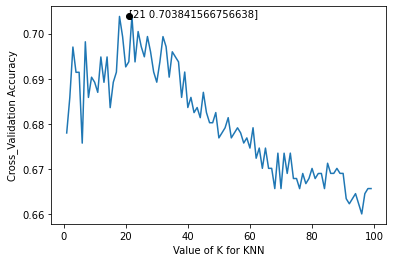

In [22]:
# KNN
def knncls(x, y):
    k_list = range(1,100)
    k_scores = list()
    
    for k in k_list:
        knn = KNeighborsClassifier(n_neighbors=k)
        scores = cross_val_score(knn, x, y, cv=5, scoring='accuracy')
        k_scores.append(scores.mean())
    
    plt.plot(k_list, k_scores)
    plt.xlabel('Value of K for KNN')
    plt.ylabel('Cross_Validation Accuracy')
    
    # plot max k value
    k_max=np.argmax(k_scores)
    show_max='['+str(k_max)+' '+str(k_scores[k_max])+']'
    plt.plot(k_max,k_scores[k_max],'ko')
    plt.annotate(show_max,xy=(k_max,k_scores[k_max]),xytext=(k_max,k_scores[k_max]))
    
    plt.show()
    return k_scores

k_scores = knncls(x_train, y_train)

In [19]:
max(k_scores)

0.703841566756638